## Not_Art Hack the Box Stego Challenge WriteUp
#### Author: 5t3g0n!
#### Level: Hard

Link to original CTF: https://app.hackthebox.com/challenges/not-art

## Usefull information before starting
In this writeup we base se solution in the following methods and libraries:
 - OpenCV
 - Numpy
 - Codecs

## First of all import usefill libraries

In [1]:
from ast import Num
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
import codecs

## Read the not_art.png image

Here is something very important!, because OpenCV read the images as BGR we have to flip the channels, converting it to RGB.



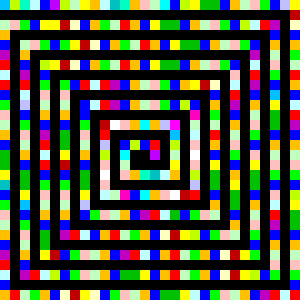

In [2]:
img = cv.imread('not_art.png',1)

src = cv.cvtColor(img, cv.COLOR_BGR2RGB)
cv2_imshow(src)

Dont worry if the colors changes, is just a matter of OpenCV, now read the values of every square and look for a similarity.

In [ ]:
# Iterate the full image
for i in src:
  print(src)

As you can see theres is onlye 3 values [0,192,255], the idea with these change every value to a **BASE 3** number as [0,1,2]. With these new values, transforms from **BASE 3** to **BASE 10**, so then you can change it to an **ASCII** value. For that i make the following function, that take as input an array of 3 values adn returns the **ASCII** value.

In [4]:
def rgb_toascii(value):
  temp = ''
  
  for i in range(3):
    if value[i] == 192:
      value[i] = 1
    elif value[i] == 255:
      value[i] = 2
    else:
      value[i] = 0
  for num in value:
    temp += str(num)

  temp = int(temp,3)
  ascii = chr(64 + temp) #Here a trick, because of the value starts on 0, you have to change the base for the ascii convertion, add 64 or 96 are the same. https://elcodigoascii.com.ar/
  return ascii

## The next discovery
now the question is, how to iterate the image making the base 3 to base 10 to ascii convertion, the trick part it that this image it is an **Piet** image, https://www.dangermouse.net/esoteric/piet.html, see for more information. These means that the important section are the only color squeares in the spiral order. Thats what the next section is it for.

In [5]:
result=''
first = 0
last = 29
while first*10+5 < 135:
    for i in range(first, last+1):
        result += rgb_toascii(src[first*10+5,i*10+5])
    for i in range(first+1, last+1):
        result += rgb_toascii(src[i*10+5,last*10+5])
    for i in reversed(range(first, last)):
        result += rgb_toascii(src[last*10+5,i*10+5])
    for i in reversed(range(first+2, last)):
        result += rgb_toascii(src[i*10+5,first*10+5])
    result += rgb_toascii(src[(first+2)*10+5,(first+1)*10+5])
    first += 2
    last -= 2
result += rgb_toascii(src[145,145])
result += rgb_toascii(src[145,155])
result += rgb_toascii(src[155,155])
print(result)

UGOYRSGPHEYLOENPXRGHCCREPNFRVHAQREFPBERYBJREPNFRGHCCREPNFRBYBJREPNFRYHCCREPNFRQHAQREFPBERYBJREPNFRLHCCREPNFRBYBJREPNFRHHAQREFPBERHCCREPNFRGYBJREPNFRUHCCREPNFRNYBJREPNFRGHAQREFPBERHCCREPNFRGYBJREPNFRUHCCREPNFRVYBJREPNFRFHAQREFPBERHCCREPNFRJYBJREPNFRNHCCREPNFRFHAQREFPBERYBJREPNFRAHCCREPNFRBYBJREPNFRGHAQREFPBERHCCREPNFRNYBJREPNFREHCCREPNFRGHAQREFPBERYBJREPNFRAHCCREPNFRBYBJREPNFREHAQREFPBERHCCREPNFRCYBJREPNFRVHCCREPNFRRYBJREPNFRGRKPYNZNGVBAZNEXRKPYNZNGVBAZNEXEVTUGPHEYLOENPXRGRBS


As you can see in the **result** string starts whit UGO..., that means that the flag it is encrypted with **ROT13** or **Ceasers**.

In [6]:
flag = codecs.decode(result,'rot_13')
print(flag)

HTBLEFTCURLYBRACKETUPPERCASEIUNDERSCORELOWERCASETUPPERCASEOLOWERCASELUPPERCASEDUNDERSCORELOWERCASEYUPPERCASEOLOWERCASEUUNDERSCOREUPPERCASETLOWERCASEHUPPERCASEALOWERCASETUNDERSCOREUPPERCASETLOWERCASEHUPPERCASEILOWERCASESUNDERSCOREUPPERCASEWLOWERCASEAUPPERCASESUNDERSCORELOWERCASENUPPERCASEOLOWERCASETUNDERSCOREUPPERCASEALOWERCASERUPPERCASETUNDERSCORELOWERCASENUPPERCASEOLOWERCASERUNDERSCOREUPPERCASEPLOWERCASEIUPPERCASEELOWERCASETEXCLAMATIONMARKEXCLAMATIONMARKRIGHTCURLYBRACKETEOF


The flag it's taking form, now for the last part we just have to change the words for the respectly symbol.

In [7]:
flag = flag.replace("LEFTCURLYBRACKET","{")
flag = flag.replace("RIGHTCURLYBRACKET", "}")
flag = flag.replace("EOF", "")
flag = flag.replace("EXCLAMATIONMARK", "!")
flag = flag.replace("UNDERSCORE","_")
flag = flag.replace("UPPERCASE","")

res = [i for i in range(len(flag)) if flag.startswith("LOWERCASE", i)]

last = []

for i in res:
  letra = flag[i+9]
  change = 'LOWERCASE'+letra
  last.append(change)

for i in last:
  flag = flag.replace(i,i[-1].lower())

print(flag)

HTB{I_tOlD_yOu_ThAt_ThIs_WaS_nOt_ArT_nOr_PiEt!!}


# Congrats!
If you read until here and understanding the process let me tell you something, you learned something new!.

keep going and Happy Hacking!